<a href="https://colab.research.google.com/github/05satyam/AI-ML/blob/main/LlamaTrace_(Hosted_Arize_Phoenix).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install llama-index llama-index-callbacks-arize-phoenix

## Dcoumentation:

1. API Key and Handler Setup: Set the PHOENIX_API_KEY for authenticating with LlamaTrace (Arize Phoenix). The **set_global_handler** function initializes LlamaTrace as the observability handler.

2. Document Creation: few example documents are created as instances of the Document class, for creating the naive RAG model.

3. Index Creation: A VectorStoreIndex is built using the documents. This index is used for retrieval in response to queries.

4. Query Execution: The **query_engine** object takes user queries, and **LlamaTrace** captures input/output pairs and trace data in real-time, viewable in the LlamaTrace dashboard.

5. View in LlamaTrace: All interactions (including queries and responses) are captured in the LlamaTrace dashboard, allowing to monitor, debug, and evaluate the application's performance.

In [2]:
import os
import llama_index.core
from llama_index.core import set_global_handler



PHOENIX_API_KEY = "<API KEY>"
os.environ["OTEL_EXPORTER_OTLP_HEADERS"] = f"api_key={PHOENIX_API_KEY}"
llama_index.core.set_global_handler(
    "arize_phoenix", endpoint="https://llamatrace.com/v1/traces"
)


In [3]:
from llama_index.llms.openai import OpenAI
os.environ["OPENAI_API_KEY"] = "sk-proj........"

In [6]:
from llama_index.core import VectorStoreIndex, Settings, Document

import openai

llm = OpenAI(model="gpt-4o", temperature=0)

Settings.llm = llm

In [7]:
documents = [
    Document(text="One Piece does exist!! ~ Whitebeard"),
    Document(text="LlamaIndex helps you build structured applications on top of LLMs."),
    Document(text="Arize Phoenix provides observability for machine learning and LLM applications.")
]
index = VectorStoreIndex.from_documents(documents)

In [8]:
query_engine = index.as_query_engine()

In [10]:
question = "one piece"
response = query_engine.query(question)
print(response)

"One Piece" is confirmed to exist by the character Whitebeard.


### Output

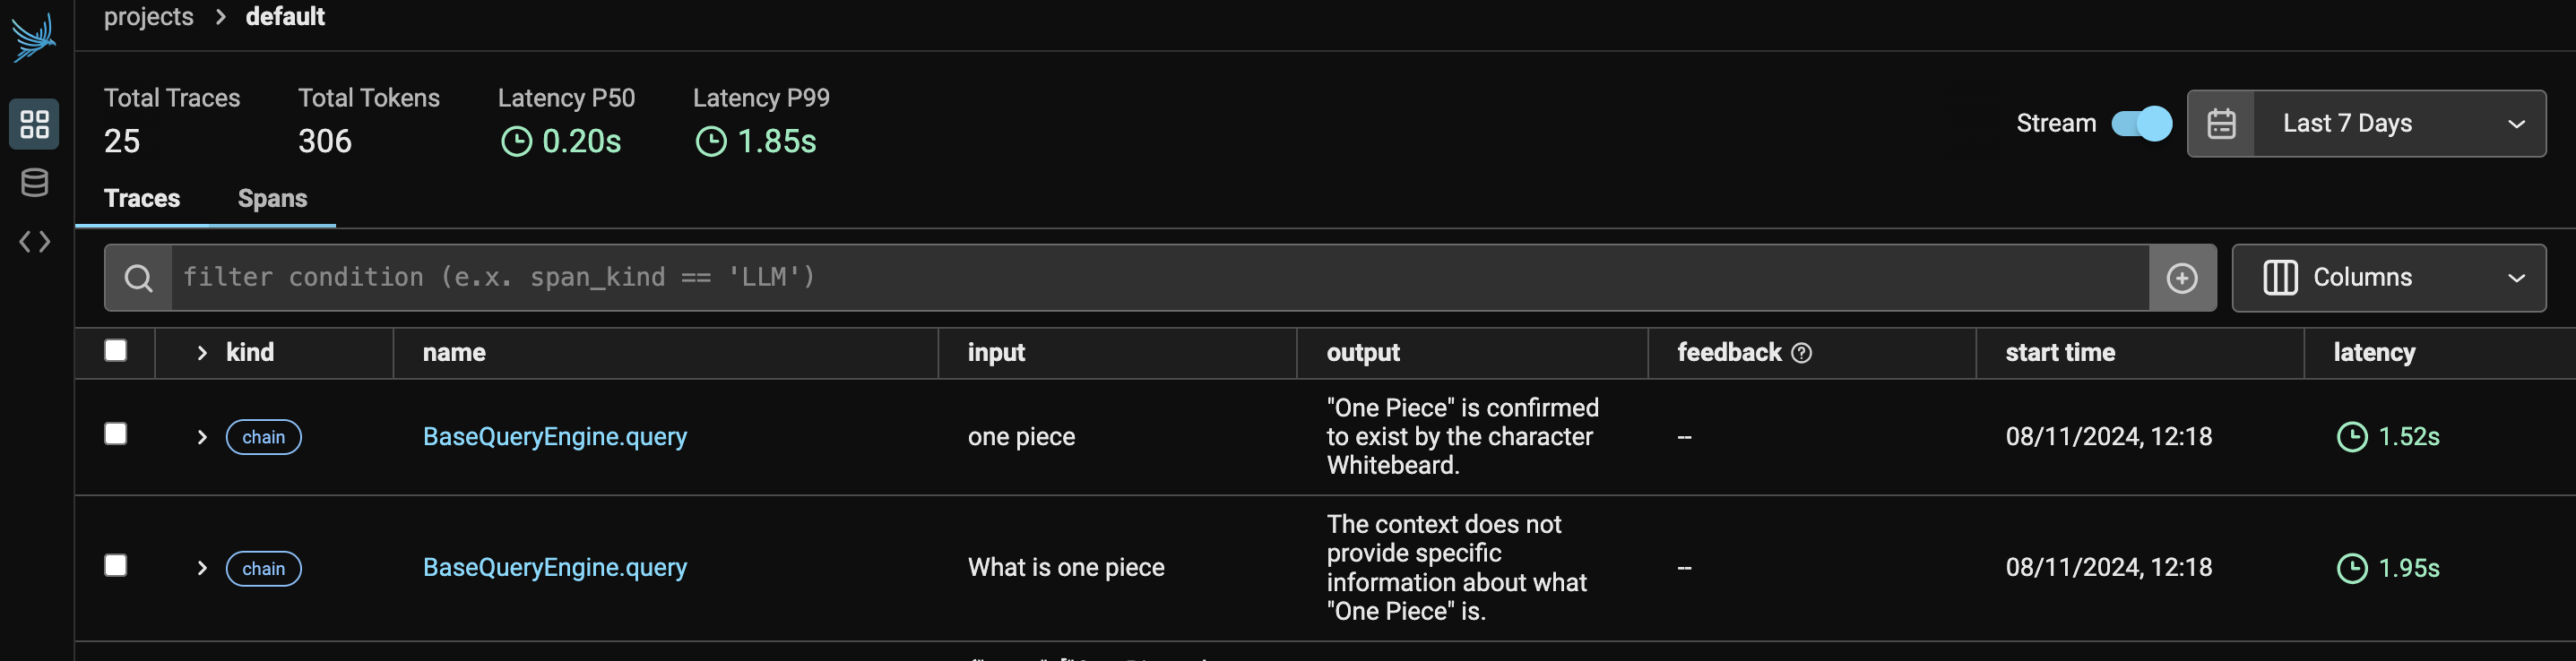